# **SMS SPAM CLASSIFIER USING NLP AND MACHINE LEARNING**

    https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


# **Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import re

#Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

#NLP Libraries
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder

#warnings
import warnings
warnings.filterwarnings("ignore")

from string import punctuation
from wordcloud import WordCloud

## **Importing data**


In [2]:
df=pd.read_csv("datasets/spam.csv",encoding='ISO-8859-1')
#encoding='ISO-8859-1'-->If there is any problem in utf-8-->It will resolve like this

## **Data Analysis**


In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
163,spam,-PLS STOP bootydelious (32/F) is inviting you ...,NaN,NaN,NaN
1429,spam,For sale - arsenal dartboard. Good condition b...,NaN,NaN,NaN
5049,ham,I will vote for wherever my heart guides me,NaN,NaN,NaN
5131,ham,That sucks. I'll go over so u can do my hair. ...,NaN,NaN,NaN
4666,ham,I send the print outs da.,NaN,NaN,NaN
3678,ham,Stupid.its not possible,NaN,NaN,NaN
3282,ham,Hey tmr maybe can meet you at yck,NaN,NaN,NaN
232,ham,"Sorry battery died, yeah I'm here",NaN,NaN,NaN
2627,ham,I know I'm lacking on most of this particular ...,NaN,NaN,NaN
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **Rename the column name**


In [8]:
df.rename(columns={"v1":"target","v2":"SMS"},inplace=True)

In [9]:
df.head()

,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Cheking missing values**


In [10]:
df.isna().sum()

target    0
SMS       0
dtype: int64

## **Checking Duplicate rows**


In [11]:
df.duplicated().sum()

403

## **Removing Duplicate rows**


In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

## **Target value counts**


In [14]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

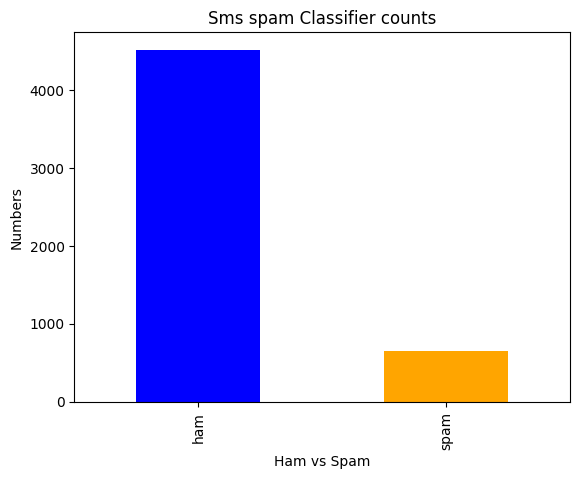

In [15]:
colors = ['blue', 'orange']
df['target'].value_counts().plot(kind='bar', color=colors)
plt.xlabel("Ham vs Spam")
plt.ylabel("Numbers")
plt.title("Sms spam Classifier counts")
plt.show()

## **PIE Chart**


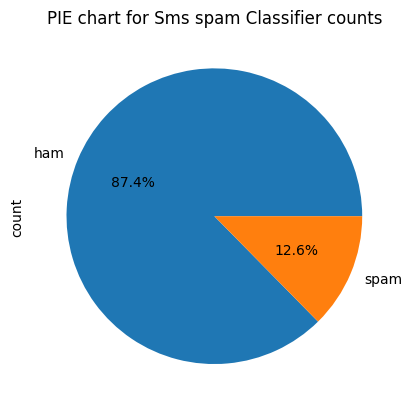

In [16]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("PIE chart for Sms spam Classifier counts")
plt.show()

## **Feature Engineerings**


**Insights**

Converting the target column into 0 and 1
ham=0 && spam=1
by using Label encoder from sklearn


In [17]:
label_encoder=LabelEncoder()
df['target']=label_encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Feature Extraction using NLTK**


In [19]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
df['SMS length']=df['SMS'].apply(len)

In [21]:
df.head()

,target,SMS,SMS length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['Word Count']=df['SMS'].apply(lambda x:len(word_tokenize(x)))

In [23]:
df.head()

,target,SMS,SMS length,Word Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['Sentence Count']=df['SMS'].apply(lambda x:len(sent_tokenize(x)))

In [25]:
df.sample(10)

,target,SMS,SMS length,Word Count,Sentence Count
5414,0,East coast,10,2,1
5453,0,Except theres a chick with huge boobs.,38,8,1
2192,0,Congrats ! Treat pending.i am not on mail for ...,108,19,2
2460,0,i cant talk to you now.i will call when i can....,64,14,1
3533,0,Good evening! How are you?,26,7,2
3019,0,I thank you so much for all you do with selfle...,72,17,2
792,0,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...,72,24,3
3093,0,Have you emigrated or something? Ok maybe 5.30...,67,14,2
1314,0,Got but got 2 colours lor. One colour is quite...,122,30,3
2291,0,Remind me how to get there and I shall do so,44,11,1


## **Checking Statisticall Value of New features**


In [26]:
df[['SMS length','Word Count','Sentence Count']].describe()

,SMS length,Word Count,Sentence Count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==0][['SMS length','Word Count','Sentence Count']].describe()

,SMS length,Word Count,Sentence Count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==1][['SMS length','Word Count','Sentence Count']].describe()

,SMS length,Word Count,Sentence Count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


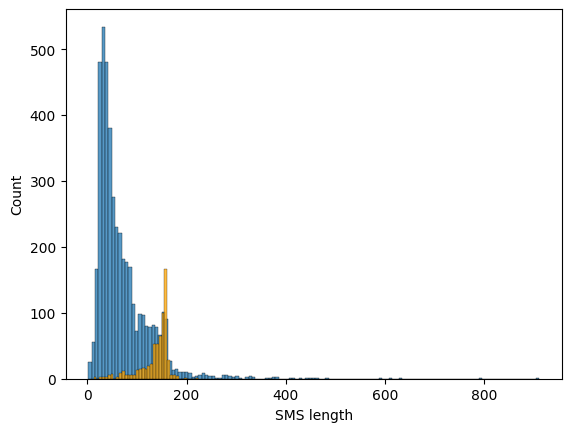

In [29]:
sns.histplot(df[df['target']==0]['SMS length'])
sns.histplot(df[df['target']==1]['SMS length'],color='orange')
plt.show()

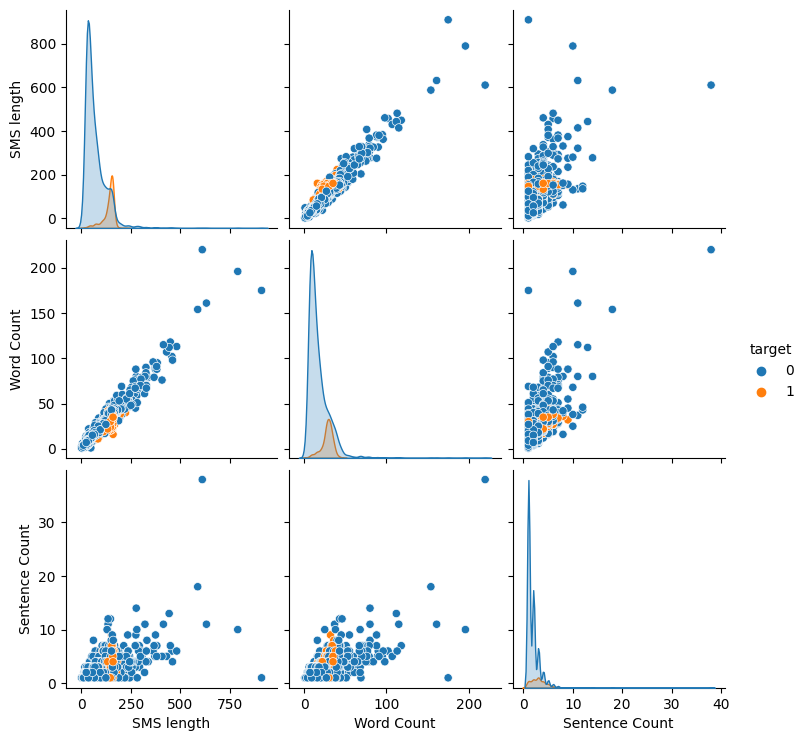

In [30]:
sns.pairplot(df,hue='target')

<Axes: >

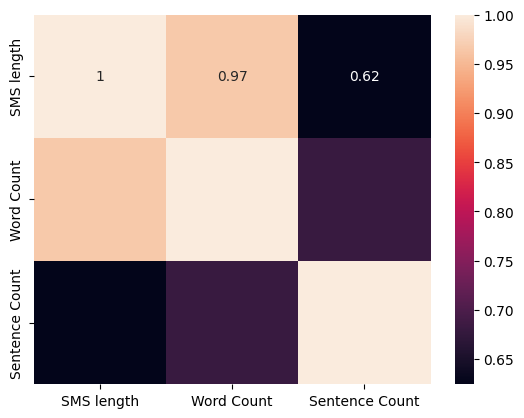

In [31]:
sns.heatmap(df[['SMS length','Word Count','Sentence Count']].corr(),annot=True)

# **Text Preprocessing**

    1.Lower case the msg
    2.Tokenization
    3.Remove Special Character
    4.Remove Stopwords and Punctuations
    5.Stemming and Lemmatization


In [32]:
nltk.download("stopwords")
mystop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [33]:
def text_preprocessing(text):
    text=text.lower()
    text=word_tokenize(text)
    text=[word for word in text if word.isalnum()]
    text=[word for word in text if word not in mystop_words and word not in punctuation]
    text=[lemmatizer.lemmatize(word) for word in text]
    return text
    

In [34]:
df['transformed_text']=df['SMS'].apply(text_preprocessing)

In [35]:
df.head()

,target,SMS,SMS length,Word Count,Sentence Count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, go, usf, life, around, though]"


## **Highlighting the main words**


(-0.5, 799.5, 399.5, -0.5)

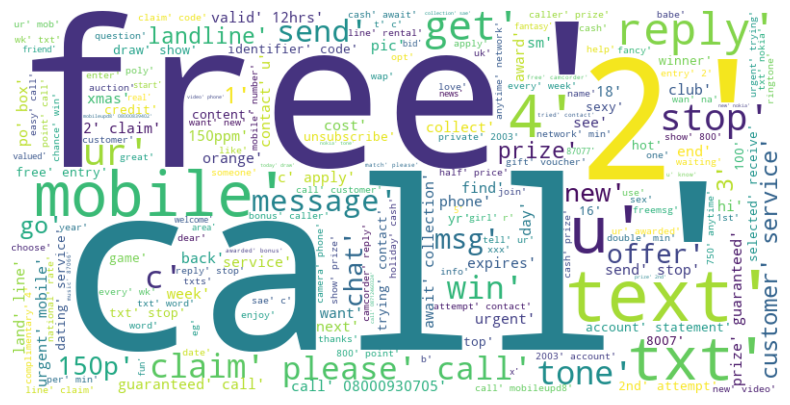

In [36]:
wc = WordCloud(width=800, height=400, max_words=200, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].dropna().astype(str).str.cat(sep=" "))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

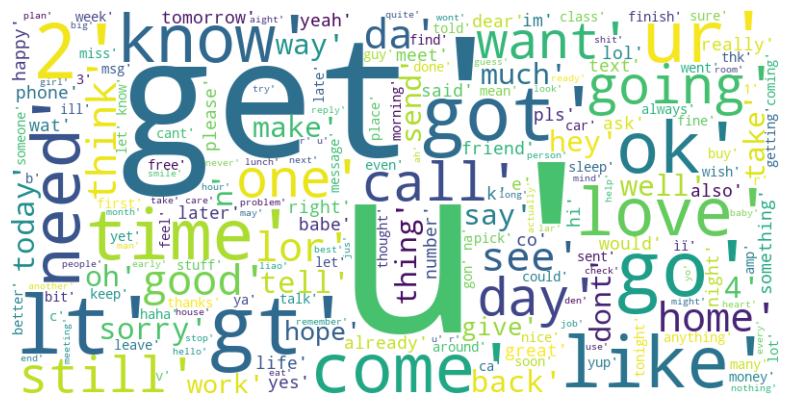

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].dropna().astype(str).str.cat(sep=" "))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')

In [38]:
spam_corpus = [word for msg in df[df['target'] == 1]['transformed_text'].dropna().astype(str).tolist() for word in msg.split()]

In [39]:
len(spam_corpus)

9939

## **Most Common words in Spam**


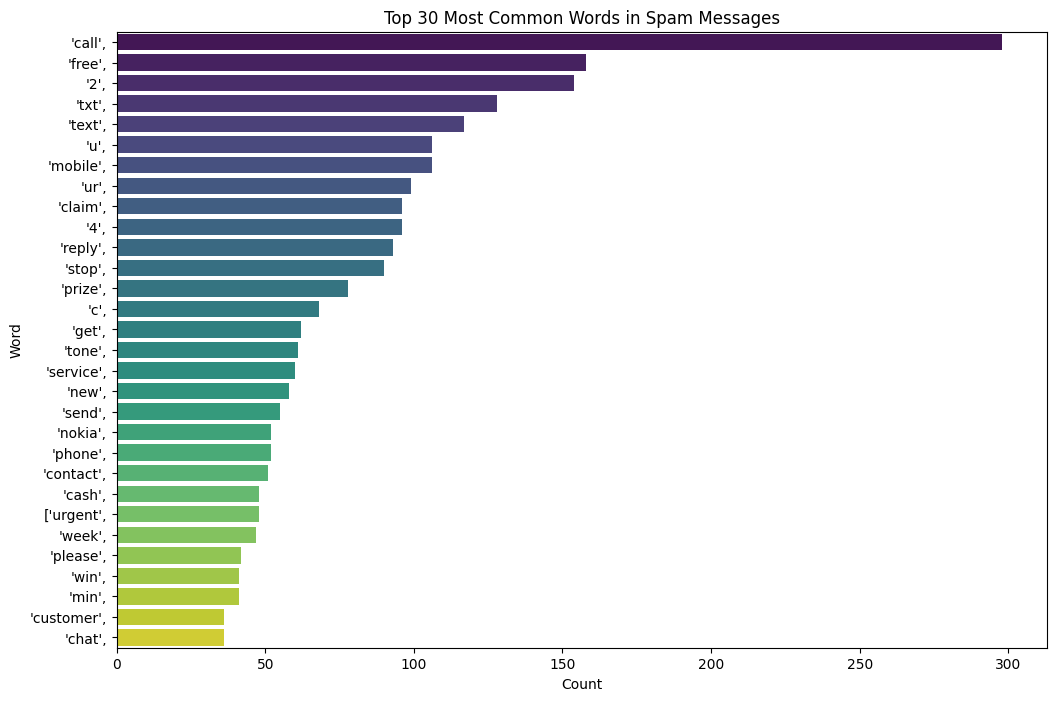

In [40]:
from collections import Counter
spam_common_words = Counter(spam_corpus).most_common(30)
words = [word[0] for word in spam_common_words]
counts = [count[1] for count in spam_common_words]

# Create the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette='viridis',)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [41]:
spam_common_words

[("'call',", 298),
 ("'free',", 158),
 ("'2',", 154),
 ("'txt',", 128),
 ("'text',", 117),
 ("'u',", 106),
 ("'mobile',", 106),
 ("'ur',", 99),
 ("'claim',", 96),
 ("'4',", 96),
 ("'reply',", 93),
 ("'stop',", 90),
 ("'prize',", 78),
 ("'c',", 68),
 ("'get',", 62),
 ("'tone',", 61),
 ("'service',", 60),
 ("'new',", 58),
 ("'send',", 55),
 ("'nokia',", 52),
 ("'phone',", 52),
 ("'contact',", 51),
 ("'cash',", 48),
 ("['urgent',", 48),
 ("'week',", 47),
 ("'please',", 42),
 ("'win',", 41),
 ("'min',", 41),
 ("'customer',", 36),
 ("'chat',", 36)]

In [42]:
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'].dropna().astype(str).tolist() for word in msg.split()]

## **Most Common words in Ham**


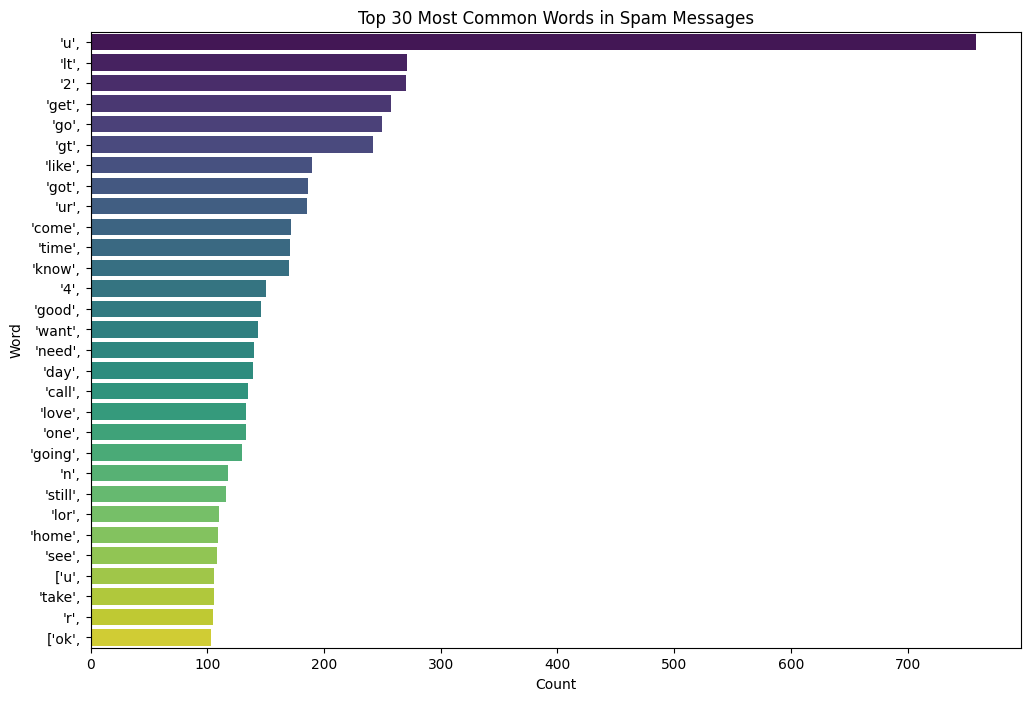

In [43]:
from collections import Counter
ham_common_words = Counter(ham_corpus).most_common(30)
words = [word[0] for word in ham_common_words]
counts = [count[1] for count in ham_common_words]

# Create the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=words, palette='viridis',)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [44]:
df.head()

,target,SMS,SMS length,Word Count,Sentence Count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, go, usf, life, around, though]"


In [45]:
#Converting the list into string or list of string
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# **Countvectorizer**


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(binary=True)
X=cv.fit_transform(df['transformed_text']).toarray()

In [89]:
X.shape

(5169, 7490)

In [90]:
y=df['target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Applying the ML Model**


## **Naive Bayes Algorithims**

    1.GaussianNB
    2.MultinomialNB
    3.BernoulliNB


In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# **GaussianNB**


In [52]:
gaussian_model=GaussianNB()
multinom_model=MultinomialNB()
bernouli_model=BernoulliNB()

In [53]:
gaussian_model.fit(X_train,y_train)
y_pred=gaussian_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8897485493230174
[[808  88]
 [ 26 112]]
0.56


# **MultinomialNB**


In [54]:
multinom_model.fit(X_train,y_train)
y_pred=multinom_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9555125725338491
[[896   0]
 [ 46  92]]
1.0


# **BernoulliNB**


In [55]:
bernouli_model.fit(X_train,y_train)
y_pred=bernouli_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9690522243713733
[[893   3]
 [ 29 109]]
0.9732142857142857


# **All ML Model Implementation**


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
logsictic_reg=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
dec_tree=DecisionTreeClassifier(max_depth=5)
neighbours=KNeighborsClassifier()
adabost=AdaBoostClassifier(n_estimators=50,random_state=2)
bagging=BaggingClassifier(n_estimators=50,random_state=2)
extra_tree=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
grad_boost=GradientBoostingClassifier(n_estimators=50,random_state=2)
random_forest=RandomForestClassifier(n_estimators=50,random_state=2)

In [76]:
classifierss={
    'Logistic reg':logsictic_reg,
    'SVC':svc,
    'multi naive':mnb,
    'Decision tree':dec_tree,
    'KNN':neighbours,
    'ada boost':adabost,
    'bagging':bagging,
    'Extra Tree cls':extra_tree,
    'XGB':xgb,
    'Gradient Boost':grad_boost,
    'Random Forest':random_forest
}

## **Function to apply all ALgorithims**


In [80]:
from sklearn.metrics import accuracy_score,precision_score
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [82]:
accuracy_score_list=[]
precision_score_list=[]
for name,clf in classifierss.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("Name: ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    accuracy_score_list.append(current_accuracy)
    precision_score_list.append(current_precision)

Name:  Logistic reg
Accuracy:  0.9439071566731141
Precision:  0.925531914893617
Name:  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
Name:  multi naive
Accuracy:  0.9555125725338491
Precision:  1.0
Name:  Decision tree
Accuracy:  0.937137330754352
Precision:  0.8348623853211009
Name:  KNN
Accuracy:  0.8965183752417795
Precision:  1.0
Name:  ada boost
Accuracy:  0.9632495164410058
Precision:  0.9385964912280702
Name:  bagging
Accuracy:  0.9642166344294004
Precision:  0.8796992481203008
Name:  Extra Tree cls
Accuracy:  0.9748549323017408
Precision:  0.9827586206896551
Name:  XGB
Accuracy:  0.9632495164410058
Precision:  0.923728813559322
Name:  Gradient Boost
Accuracy:  0.9535783365570599
Precision:  0.8947368421052632
Name:  Random Forest
Accuracy:  0.9729206963249516
Precision:  1.0


## **Making Dataframe of Precision Score and Accuracy score**


In [85]:
performance_df=pd.DataFrame({"Algorithims":classifierss.keys(),
                            "Accuracy":accuracy_score_list,
                            "Precision":precision_score_list}).sort_values("Precision",ascending=False)

In [86]:
performance_df

,Algorithims,Accuracy,Precision
2,multi naive,0.955513,1.000000
4,KNN,0.896518,1.000000
10,Random Forest,0.972921,1.000000
7,Extra Tree cls,0.974855,0.982759
1,SVC,0.972921,0.974138
5,ada boost,0.963250,0.938596
0,Logistic reg,0.943907,0.925532
8,XGB,0.963250,0.923729
9,Gradient Boost,0.953578,0.894737
6,bagging,0.964217,0.879699


In [87]:
import pickle
pickle.dump(cv,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))